# IMDB Analysis

Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from warnings import filterwarnings
filterwarnings('ignore')

Import IMDB files to analyze

In [2]:
name_basics = pd.read_csv('./zippeddata/imdb.name.basics.csv.gz')
title_ratings = pd.read_csv('./zippeddata/imdb.title.ratings.csv.gz')
title_principals = pd.read_csv('./zippeddata/imdb.title.principals.csv.gz')
title_basics = pd.read_csv('./zippeddata/imdb.title.basics.csv.gz')
title_akas = pd.read_csv('./zippeddata/imdb.title.akas.csv.gz')








#### Skim through data to just see which ones are relavent 

In [3]:
name_basics.head(2)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [4]:
title_principals

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN


In [5]:
num_ppl_involved=title_principals.groupby(["tconst"])["category"].value_counts()

In [6]:
num_ppl_involved

tconst     category       
tt0063540  writer             4
           actor              3
           actress            1
           composer           1
           director           1
                             ..
tt9916730  director           1
           editor             1
tt9916754  cinematographer    4
           self               4
           director           2
Name: category, Length: 631503, dtype: int64

In [7]:
title_basics.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [8]:
title_ratings.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [9]:
name_basics.drop(columns = ["birth_year", "death_year"], inplace = True)
name_basics.isnull().sum()

nconst                    0
primary_name              0
primary_profession    51340
known_for_titles      30204
dtype: int64

In [10]:
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 4 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: object(4)
memory usage: 18.5+ MB


In [11]:
title_principals.shape

(1028186, 6)

In [12]:
title_principals.drop(columns = ["job","characters","ordering"], inplace = True)

In [13]:
title_principals.shape

(1028186, 3)

In [14]:
title_principals.isnull().sum()

tconst      0
nconst      0
category    0
dtype: int64

In [15]:
title_akas.shape

(331703, 8)

In [16]:
title_akas.head(2)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


In [17]:
title_akas.drop(columns = ["ordering", "language","types","attributes","is_original_title"], inplace = True)

In [18]:
title_akas.drop_duplicates(subset=['title_id'],inplace = True)
title_akas.shape

(122302, 3)

In [19]:
title_basics.drop(columns = ["primary_title", "runtime_minutes"],inplace = True)

In [20]:
title_basics.drop_duplicates(subset = ["tconst"], inplace = True)

In [21]:
title_basics.columns

Index(['tconst', 'original_title', 'start_year', 'genres'], dtype='object')

In [22]:
title_ratings.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [23]:
title_ratings.drop_duplicates(subset = ["tconst"], inplace = True)
title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


# Scrubbing through Title_akas 

### Considering if Microsoft should only focus on US market. 

- lowkey the way IMDB collectes data is weird... foreign countries use distributors to show their movies and i dont know  how IMDB labels them. 

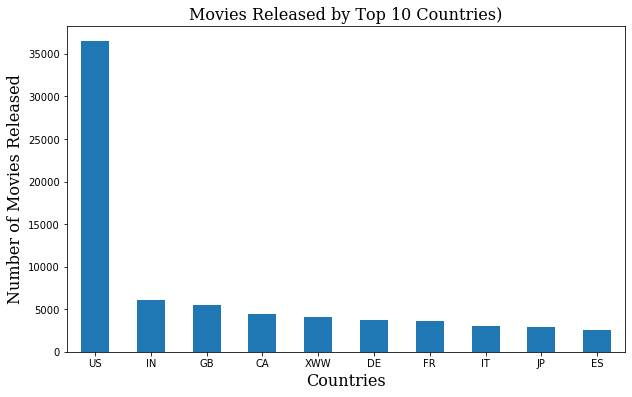

In [24]:
movies_released_region = title_akas.region.value_counts()[:10]
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

movies_released_region.plot(kind= "bar", figsize = (10,6))
plt.title("Movies Released by Top 10 Countries)", fontdict = font)
plt.xlabel("Countries", fontdict = font)
plt.ylabel("Number of Movies Released", fontdict = font)
plt.xticks(rotation=0);
plt.savefig('images/top_10_countries.png', bbox_inches = "tight");

# Since there is a lot of data in US alone. It might be beneficial to focus on US alone. Additionally XWW is an anomoly since there is no region as such. 




In [25]:
us_title_akas = title_akas.loc[title_akas["region"] == "US"]

In [26]:
#us_title_akas = us_title_akas.drop(columns = ["language", "attributes", "types", "is_original_title"])

In [27]:
# Will use this to merge on Title_id in name_basics at the very end. Will only focus on US movies. 

us_title_akas

,title_id,title,region
152,tt10379338,Guys Night Out,US
186,tt1180174,Liberty,US
191,tt1189904,Small Town Hero,US
224,tt1210047,Snatched! Curse of the Pink Panties 2,US
261,tt1220221,Motherland,US
...,...,...,...
331539,tt7385718,Conway Pride,US
331574,tt8855960,Straight Up,US
331582,tt8901666,The Journey Ahead,US
331686,tt9705860,Dusan Vukotic Croatian Oscar Winner,US


In [28]:
title_basics.head(2)

,tconst,original_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,Ashad Ka Ek Din,2019,"Biography,Drama"


In [29]:
title_principals.columns


Index(['tconst', 'nconst', 'category'], dtype='object')

In [30]:
title_ratings.columns


Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

#### I see that the imdb title.xyz files all have the tconst column and can merge on that to create 1 title_imdb dataframe. 
Decicde on the method of join (inner or outer). 
Main focus is to join on tconst. 
- Outer join is messier because it introduces more NaN values. 
- Inner join produces million rows to work with and still has 0 NaN values in tconst. 

So inner join is okay. 
But first lets merge principals to akas and then we can join everything based on tconst

In [31]:
actor_df=title_principals.loc[title_principals["category"] == "actor"]

In [32]:
actress_df = title_principals.loc[title_principals["category"] == "actress"]

In [33]:
actor_df.columns

Index(['tconst', 'nconst', 'category'], dtype='object')

In [34]:
actress_df.columns

Index(['tconst', 'nconst', 'category'], dtype='object')

In [35]:
ana=pd.concat([actor_df, actress_df])
# this is filtered title_principals. No need to use title_principals again. 
# ana = filtered version of title_principals
ana.head(2)

,tconst,nconst,category
0,tt0111414,nm0246005,actor
5,tt0323808,nm2694680,actor


In [36]:
# title_basics.head(2)

In [37]:
# print(name_basics.shape)
# print(actor_df.shape)
# print(actress_df.shape)

In [38]:
name_basics.head(2)

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [39]:
#merging title_basics with actor_df and actress on tconst 

title_basics_ana=title_basics.merge(ana, how = "inner", on = "tconst")


# title basics and principals have been merged. need to merge ratings
title_basics_ana.head(2)

,tconst,original_title,start_year,genres,nconst,category
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",nm0474801,actor
1,tt0063540,Sunghursh,2013,"Action,Crime,Drama",nm0756379,actor


In [40]:
bas_ana_rat =title_basics_ana.merge(title_ratings, how = "inner", on = "tconst")

In [41]:
bas_ana_rat.head() # this is title_basics, title_principals and title_ratings all filtered and mergered together

,tconst,original_title,start_year,genres,nconst,category,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",nm0474801,actor,7.0,77
1,tt0063540,Sunghursh,2013,"Action,Crime,Drama",nm0756379,actor,7.0,77
2,tt0063540,Sunghursh,2013,"Action,Crime,Drama",nm0474876,actor,7.0,77
3,tt0063540,Sunghursh,2013,"Action,Crime,Drama",nm0904537,actress,7.0,77
4,tt0066787,Ashad Ka Ek Din,2019,"Biography,Drama",nm0451809,actor,7.2,43


In [42]:
bas_ana_rat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248442 entries, 0 to 248441
Data columns (total 8 columns):
tconst            248442 non-null object
original_title    248442 non-null object
start_year        248442 non-null int64
genres            246077 non-null object
nconst            248442 non-null object
category          248442 non-null object
averagerating     248442 non-null float64
numvotes          248442 non-null int64
dtypes: float64(1), int64(2), object(5)
memory usage: 17.1+ MB


In [43]:
us_title_akas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36494 entries, 152 to 331694
Data columns (total 3 columns):
title_id    36494 non-null object
title       36494 non-null object
region      36494 non-null object
dtypes: object(3)
memory usage: 1.1+ MB


In [44]:
name_basics.head(2)

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In [45]:
# need to merge us_title_akas and bas_ana_rat based on title_id/tconst.
#then need to merge with name basics on nconst and drop primary_profession

In [46]:
us_bas_ana_rat = us_title_akas.merge(bas_ana_rat, how = "inner", left_on = "title_id", right_on="tconst")

In [47]:
us_bas_ana_rat.drop_duplicates(subset="title_id", inplace = True)

In [48]:
imdb = us_bas_ana_rat.merge(name_basics, how = "inner", on ="nconst")

In [49]:
imdb.head(2)

,title_id,title,region,tconst,original_title,start_year,genres,nconst,category,averagerating,numvotes,primary_name,primary_profession,known_for_titles
0,tt1210047,Snatched! Curse of the Pink Panties 2,US,tt1210047,Snatched!,2010,"Comedy,Crime,Mystery",nm2551103,actor,5.9,56,Danilo Mancinelli,"actor,producer,stunts","tt1210047,tt1401566,tt3597072,tt0976035"
1,tt1226831,Spark Riders,US,tt1226831,Spark Riders,2010,Sci-Fi,nm2405736,actress,7.2,13,Meggan Anderson,"actress,director,writer","tt0112056,tt4515698,tt0787407,tt1226831"


In [50]:
imdb.isnull().sum()

title_id                0
title                   0
region                  0
tconst                  0
original_title          0
start_year              0
genres                 66
nconst                  0
category                0
averagerating           0
numvotes                0
primary_name            0
primary_profession    512
known_for_titles       42
dtype: int64

df['number_of_movies'] =df[df['primary_profession'].notnull()][df.primary_profession.str.contains(".*director")].known_for_titles.astype(str).str.split(',').apply(lambda x: len(x))

In [51]:
imdb.drop(columns = ["nconst", "primary_profession", "tconst", "region", "original_title"], inplace = True)

In [52]:
imdb.describe()

,start_year,averagerating,numvotes
count,13250.000000,13250.000000,13250.000000
mean,2013.919774,6.185940,988.224604
std,2.534593,1.652503,14375.978987
min,2010.000000,1.000000,5.000000
25%,2012.000000,5.000000,11.000000
50%,2014.000000,6.300000,28.000000
75%,2016.000000,7.500000,107.000000
max,2019.000000,10.000000,620079.000000


In [53]:
imdb.known_for_titles.isnull().sum()

42

In [54]:
imdb.known_for_titles = imdb.known_for_titles.str.split(",")

In [55]:
imdb.dropna(subset = imdb.known_for_titles, axis = 1, inplace = True)

TypeError: unhashable type: 'list'

In [ ]:
number = [] #[len(i) for i in imdb["known_for_titles"].values if len(i)>0 else 0]
for i in imdb["known_for_titles"].values:
    if type(i)== float:
        number.append(0)
    else:
        number.append(len(i))
    
imdb["number_of_movies"] = number 
imdb.head(5)

In [ ]:
#imdb.drop(columns = ["title_id", "known_for_titles"],inplace = True)

In [ ]:
imdb.head()

In [ ]:
imdb.to_csv("zippedData/imdb_master.csv")

In [ ]:
imdb[imdb["title_id"]=="tt4515698"]

In [ ]:
imdb.shape

In [ ]:
avgimdb[imdb["genres"]=="Animation"]["averagerating"].mean()